In [1]:
# imports for the demo
from ananke.graphs import ADMG
from ananke.identification import OneLineID

# Back-Door

Identification of $p(Y(a))$ in a DAG where the functional reduces to simple back-door adjustment.

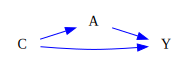

In [2]:
vertices = ['A', 'C', 'Y']
di_edges = [('C', 'A'), ('C', 'Y'), ('A', 'Y')]
backdoor_G = ADMG(vertices, di_edges=di_edges)
backdoor_G.draw(direction='LR')

Identifed = True ; Functional = ΣC ΦYA(p(V);G) ΦCA(p(V);G) 


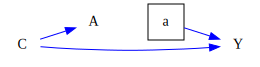

In [3]:
outcomes = ['Y']
interventions = ['A']
id_pya = OneLineID(graph=backdoor_G, interventions=interventions, outcomes=outcomes)
print('Identifed =', id_pya.id(), '; Functional =', id_pya.functional())
id_pya.draw_swig(direction='LR')

Which reduces to the back-door functional: $\sum_C p(Y|A, C)p(C)$

# Front-Door

Identification of $p(Y(a))$ in the front-door graph.

In [4]:
vertices = ['A', 'M', 'Y']
di_edges = [('A', 'M'), ('M', 'Y')]
bi_edges = [('A', 'Y')]
frontdoor_G = ADMG(vertices, di_edges=di_edges, bi_edges=bi_edges)
frontdoor_G.draw(direction='LR')
id_pya.export_intermediates('frontdoor')

Identifed = True ; Functional = ΣM ΦAY(p(V);G) ΦAM(p(V);G) 


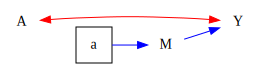

In [5]:
outcomes = ['Y']
interventions = ['A']
id_pya = OneLineID(graph=frontdoor_G, interventions=interventions, outcomes=outcomes)
print('Identifed =', id_pya.id(), '; Functional =', id_pya.functional())
id_pya.draw_swig(direction='LR')

Which reduces to the front-door functional: $\sum_M \big( \sum_{A'} p(Y|M, A')p(A') \big) p(M|A)$

# A more complicated example

Identification of $p(Y(a))$ in a more complicated graph.

Identifed = True ; Functional = ΣBDC ΦAC(p(V);G) ΦABDY(p(V);G) 


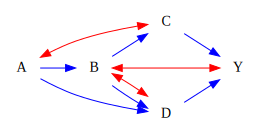

In [6]:
vertices = ['A', 'B', 'C', 'D', 'Y']
di_edges = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'Y'), ('B', 'D'), ('D', 'Y')]
bi_edges = [('A', 'C'), ('B', 'Y'), ('B', 'D')]
G = ADMG(vertices, di_edges, bi_edges)
id_pya = OneLineID(graph=G, interventions=['A'], outcomes=['Y'])
print('Identifed =', id_pya.id(), '; Functional =', id_pya.functional())
id_pya.export_intermediates()
G.draw(direction='LR')

Try identifying $p(Y(a, b))$ in the same graph and notice that it fails

In [7]:
id_pyab = OneLineID(graph=G, interventions=['A', 'B'], outcomes=['Y'])
print('Identifed =', id_pyab.id(), '; Functional =', id_pyab.functional())

Identifed = False ; Functional = Cannot create functional, query is not ID
